**Section I: Import the Data**

Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
!pwd

/Users/michaelmainzer/Documents/GA/DSI/mike1/02-lessons/week-07/1.2-lab/code/starter-code


In [3]:
adult = pd.read_csv('../../assets/datasets/adult.csv')

In [4]:
adult.dropna(inplace=True)

**Section II: Format the Data**

Convert the data to a Pandas dataframe to work with the data:

Convert the categorical Data to numeric for our analysis. **HINT:** Refer to lesson 1.1 for writing a function of this sort

In [5]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,small
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,small
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,small


In [6]:
adult['workClass'] = adult['workclass'].map({'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4,
       'Local-gov': 5, 'Self-emp-inc': 6, 'Without-pay': 7, 'Never-worked': 8})

adult['maritalStatus'] = adult['marital-status'].map({'Never-married': 1, 'Married-civ-spouse': 2, 'Divorced': 3,
       'Married-spouse-absent': 4, 'Separated': 5, 'Married-AF-spouse': 6, 'Widowed': 7})

adult['occ'] = adult['occupation'].map({'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3,
       'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Transport-moving': 7,
       'Farming-fishing': 8, 'Machine-op-inspct': 9, 'Tech-support': 10,
       'Craft-repair': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14})

adult['relat'] = adult['relationship'].map({'Not-in-family':1, 'Husband': 2, 'Wife': 3, 'Own-child': 4, 'Unmarried': 5,
       'Other-relative': 6})

adult['raceClass'] = adult['race'].map({'White': 1, 'Black': 2, 'Asian-Pac-Islander': 3, 'Amer-Indian-Eskimo': 4,
       'Other': 5})

adult['sexClass'] = adult['sex'].map({'Male': 1, 'Female': 2})

adult['nativeCountry'] = adult['native-country'].map({'United-States': 1, 'Cuba': 2, 'Jamaica': 3, 'India': 4, 
                                                      'Mexico': 5,'Puerto-Rico': 6, 'Honduras': 7, 'England': 8, 'Canada': 9, 
                                                      'Germany': 10, 'Iran': 11, 'Philippines': 12, 'Poland': 13, 'Columbia': 14, 
                                                      'Cambodia': 15, 'Thailand': 16, 'Ecuador': 17, 'Laos': 18, 'Taiwan': 19, 
                                                      'Haiti': 20, 'Portugal': 21, 'Dominican-Republic': 22, 'El-Salvador': 23, 
                                                      'France': 24, 'Guatemala': 25, 'Italy': 26, 'China': 27, 'South': 28, 
                                                      'Japan': 29, 'Yugoslavia': 30, 'Peru': 31, 'Outlying-US(Guam-USVI-etc)': 32, 
                                                      'Scotland': 33, 'Trinadad&Tobago': 34, 'Greece': 35, 'Nicaragua': 36, 
                                                      'Vietnam': 37, 'Hong': 38, 'Ireland': 39, 'Hungary': 40, 
                                                      'Holand-Netherlands': 41})

adult['incomeClass'] = adult['income'].map({'small': 1, 'large': 2})



Apply the functions you just wrote and append the results to the dataframe

In [7]:
adult.drop(['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income'], axis=1, inplace=True)

**Section III: Examine the Data**

Plot the Data to see the distributions our our target markets; plot multiple indicators to see the relationships *IE: Education and Income*

In [8]:
adult.head()

,age,fnlwgt,education,education-num,capital-gain,capital-loss,hours-per-week,workClass,maritalStatus,occ,relat,raceClass,sexClass,nativeCountry,incomeClass
0,39,77516,Bachelors,13,2174,0,40,1,1,1,1,1,1,1,1
1,50,83311,Bachelors,13,0,0,13,2,2,2,2,1,1,1,1
2,38,215646,HS-grad,9,0,0,40,3,3,3,1,1,1,1,1
3,53,234721,11th,7,0,0,40,3,2,3,2,2,1,1,1
4,28,338409,Bachelors,13,0,0,40,3,2,4,3,2,2,2,1


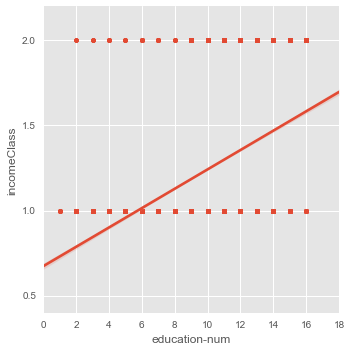

In [9]:
sns.lmplot('education-num','incomeClass', data=adult)

In [10]:
adult.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workClass,maritalStatus,occ,relat,raceClass,sexClass,nativeCountry,incomeClass
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.064147,0.412606,0.002072,-0.198226,-0.035019,-0.081993,-0.005066,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.001827,-0.021061,0.013240,0.016246,0.002060,-0.025362,0.030210,-0.008957
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.062729,-0.061656,-0.254908,-0.142719,-0.043076,-0.006157,-0.063337,0.335286
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,0.046010,0.005618,-0.042283,-0.043716,-0.010174,-0.048814,-0.010744,0.221196
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.023528,0.006925,-0.015952,-0.050718,-0.021910,-0.047011,-0.003800,0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.080432,0.052417,1.000000,0.063884,0.017179,0.045238,-0.194521,-0.037586,-0.231268,-0.008613,0.229480
workClass,0.064147,-0.001827,0.062729,0.046010,0.023528,0.063884,1.000000,0.025007,-0.046620,-0.007209,0.001414,-0.005652,-0.012075,0.095157
maritalStatus,0.412606,-0.021061,-0.061656,0.005618,0.006925,0.017179,0.025007,1.000000,-0.011716,0.049913,0.017226,0.178045,0.003796,0.007459
occ,0.002072,0.013240,-0.254908,-0.042283,-0.015952,0.045238,-0.046620,-0.011716,1.000000,-0.066185,-0.009103,-0.263619,0.018083,-0.070240
relat,-0.198226,0.016246,-0.142719,-0.043716,-0.050718,-0.194521,-0.007209,0.049913,-0.066185,1.000000,0.099665,0.275419,0.043329,-0.168993


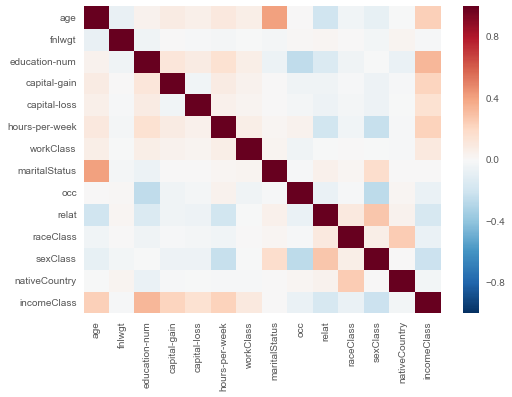

In [11]:
sns.heatmap(adult.corr())

**Section IV: Prepare for Clustering**

Create a New Dataframe with just numerical data for the analysis

Check for NaN and Infinite Numbers - Our data is messy!

In [12]:
#specify which variables you want to use based on your EDA above
adultMat = adult.as_matrix(['incomeClass','age'])

**Section V: Clustering Analysis**

Cluster the Data to our our target groups. **BONUS**: Perform multiple clustering tests on various indicator variables

In [13]:
k = 2
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(adultMat)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [14]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
metrics.silhouette_score(adultMat, labels, metric='euclidean')

AttributeError: 'KMeans' object has no attribute 'labels_'

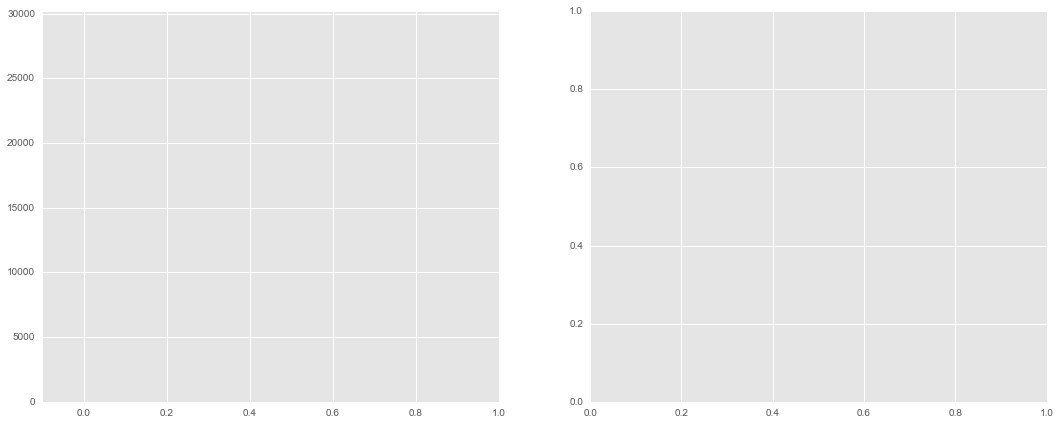

In [17]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(adultMat) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=10)
    labels2 = clusterer.labels_

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(adultMat, labels2)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(adultMat, labels2)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(labels2.astype(float) / n_clusters)
    ax2.scatter(adultMat[:, 0], adultMat[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

Compute the Silhoutte Score to measure your analysis